# Linear systems - iterative solvers

## Set up matrix

  (5, 0)	1.0
  (6, 1)	1.0
  (7, 2)	1.0
  (8, 3)	1.0
  (9, 4)	1.0
  (10, 5)	1.0
  (11, 6)	1.0
  (12, 7)	1.0
  (13, 8)	1.0
  (14, 9)	1.0
  (15, 10)	1.0
  (16, 11)	1.0
  (17, 12)	1.0
  (18, 13)	1.0
  (19, 14)	1.0
  (20, 15)	1.0
  (21, 16)	1.0
  (22, 17)	1.0
  (23, 18)	1.0
  (24, 19)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 4)	1.0
  :	:
  (19, 20)	1.0
  (20, 21)	1.0
  (21, 22)	1.0
  (22, 23)	1.0
  (23, 24)	1.0
  (0, 5)	1.0
  (1, 6)	1.0
  (2, 7)	1.0
  (3, 8)	1.0
  (4, 9)	1.0
  (5, 10)	1.0
  (6, 11)	1.0
  (7, 12)	1.0
  (8, 13)	1.0
  (9, 14)	1.0
  (10, 15)	1.0
  (11, 16)	1.0
  (12, 17)	1.0
  (13, 18)	1.0
  (14, 19)	1.0
  (15, 20)	1.0
  (16, 21)	1.0
  (17, 22)	1.0
  (18, 23)	1.0
  (19, 24)	1.0
[[20 21 22 23 24]
 [15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]
<class 'scipy.sparse._dia.dia_matrix'>


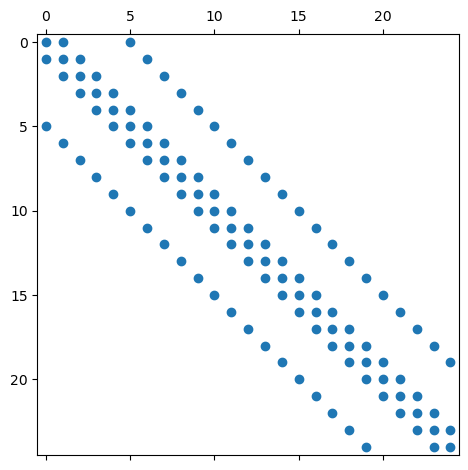

In [1]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags, lil_matrix,csr_matrix,csc_matrix
from matplotlib import cm
import matplotlib.pyplot as plt

Nx,Ny = 5,5 # Number of grid points along x,y direction
Nc = Nx*Ny    # Total number of points

e = np.ones(Nc)
A = diags([e, e, -4*e, e, e], [-Nx, -1, 0, 1, Nx], shape=(Nc,Nc))
b = np.zeros(Nc)
print(A)
plt.spy(A, marker='o',markersize=6)
plt.tight_layout()

print(np.arange(Nc).reshape((Nx,Ny))[::-1])
print(type(A))

## Boundary conditions

In [2]:
bnd_bottom = np.arange(Nx)
bnd_left = np.arange(Ny) * Nx
bnd_right = bnd_left + Nx - 1
bnd_top = bnd_bottom + Nx*(Ny-1)
print(bnd_bottom, bnd_left, bnd_right, bnd_top)

bnd_all = np.unique(np.concatenate((bnd_bottom,bnd_left,bnd_right,bnd_top)))
print(bnd_all)

Tb = {'bottom': 300, 'left': 1000, 'right': 1000, 'top': 500}


A = lil_matrix(A)
# For all equations that represent a boundary, reset the coefficient row to zero
# consequently add a 1 only on the main diagonal
A[bnd_all,:] = 0
A[bnd_all,bnd_all] = 1

b[bnd_bottom] = Tb['bottom']
b[bnd_left] = Tb['left']
b[bnd_right] = Tb['right']
b[bnd_top] = Tb['top']

[0 1 2 3 4] [ 0  5 10 15 20] [ 4  9 14 19 24] [20 21 22 23 24]
[ 0  1  2  3  4  5  9 10 14 15 19 20 21 22 23 24]


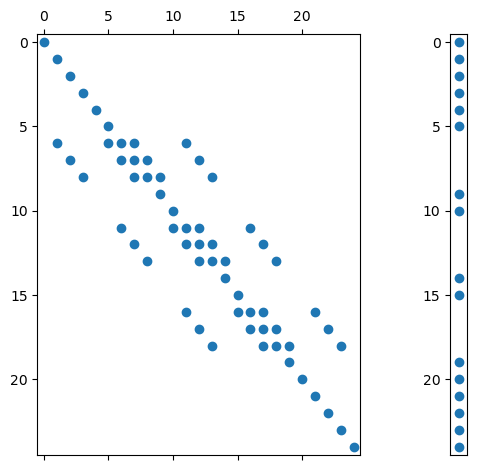

In [3]:
ax1 = plt.subplot(121); plt.spy(A, marker='o',markersize=6, aspect="auto")
ax2 = plt.subplot(122); plt.spy(b[:,None], marker='o',markersize=6);
ax1.sharey
plt.xticks([]) 
plt.tight_layout()
plt.savefig('sparse_python_bnds.pdf')

In [4]:
A = A.tocsc()
T = spsolve(A,b)


In [5]:
print(T.reshape(Nx,Ny)[::-1])


[[ 500.          500.          500.          500.          500.        ]
 [1000.          735.71428571  667.85714286  735.71428571 1000.        ]
 [1000.          775.          700.          775.         1000.        ]
 [1000.          664.28571429  582.14285714  664.28571429 1000.        ]
 [1000.          300.          300.          300.         1000.        ]]


In [6]:
x,y = np.meshgrid(np.arange(Nx),np.arange(Ny))

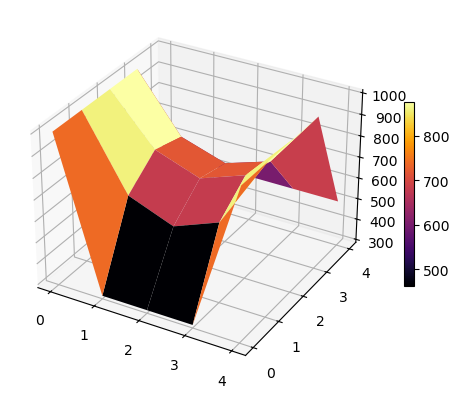

In [7]:
Tnum = T.reshape(Nx,Ny)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x,y,Tnum,cmap=cm.inferno)
fig.colorbar(surf, shrink=0.5)

## Verification

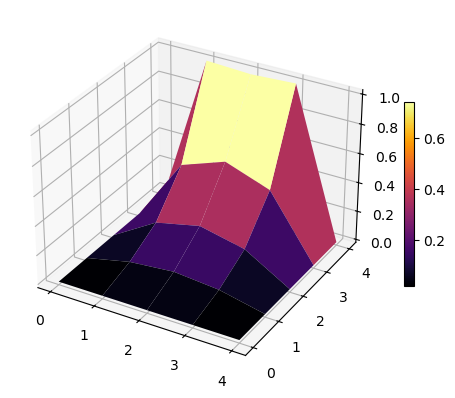

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Nx = Ny = 5

xf,yf = np.meshgrid(np.linspace(0,1,Nx),np.linspace(0,1,Ny))
term = np.zeros_like(xf)
N = 100

for m in range(1,N,2):
    term = term + (np.sin(m*np.pi*xf)*np.sinh(m*np.pi*yf)) / (m*np.sinh(m*np.pi))

# Exact solution
Tex = term * 4 / np.pi
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x,y,Tex,cmap=cm.inferno)
fig.colorbar(surf, shrink=0.5)
plt.show()

In [9]:
from laplace_demo import create_laplace_coefficient_matrix, set_boundary_conditions

Tb = {'bottom': 0, 'left': 0, 'right': 0, 'top': 1}
A,b = create_laplace_coefficient_matrix(Nx,Ny)
A,b = set_boundary_conditions(A, b, Tb, Nx, Ny)

Tnum = spsolve(A,b).reshape((Nx,Ny))

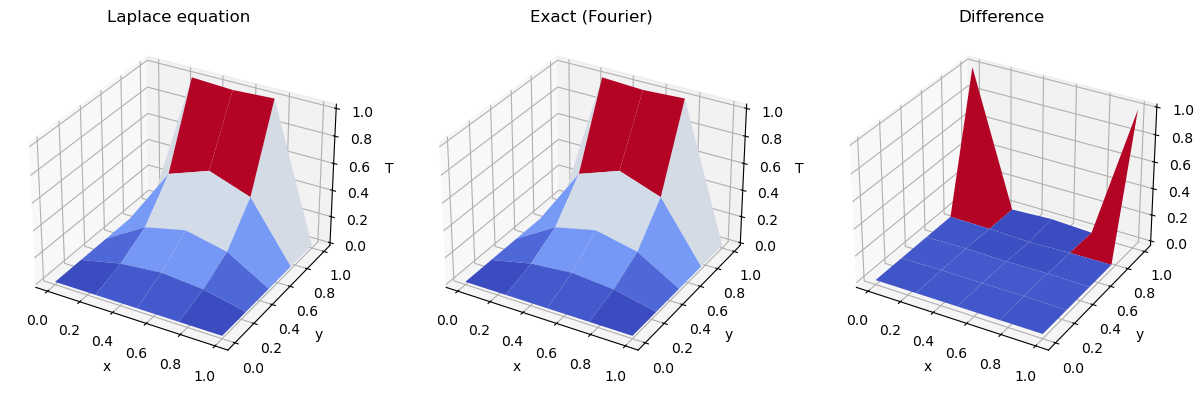

<Figure size 640x480 with 0 Axes>

In [10]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(projection='3d'))
# Plot the numerical 
axs[0].plot_surface(xf, yf, Tex, cmap = "coolwarm")
axs[0].set_xlabel('x'); axs[0].set_ylabel('y'); axs[0].set_zlabel('T')
axs[0].set_title("Laplace equation ")
# Plot exact (Fourier)
axs[1].plot_surface(xf, yf, Tex, cmap='coolwarm')
axs[1].set_xlabel('x'); axs[1].set_ylabel('y'); axs[1].set_zlabel('T')
axs[1].set_title("Exact (Fourier)")
# Plot difference
axs[2].plot_surface(xf, yf, Tnum - Tex, cmap='coolwarm')
axs[2].set_xlabel('x'); axs[2].set_ylabel('y'); axs[2].set_zlabel('T')
axs[2].set_title("Difference")
plt.show()
plt.savefig('laplace_exact_comparison.pdf')

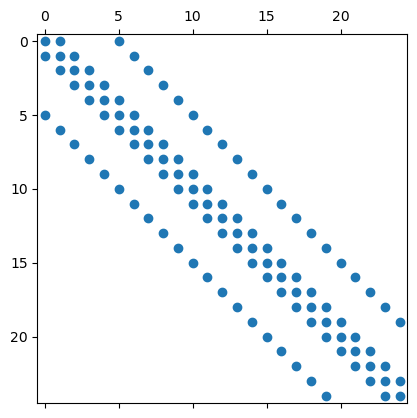

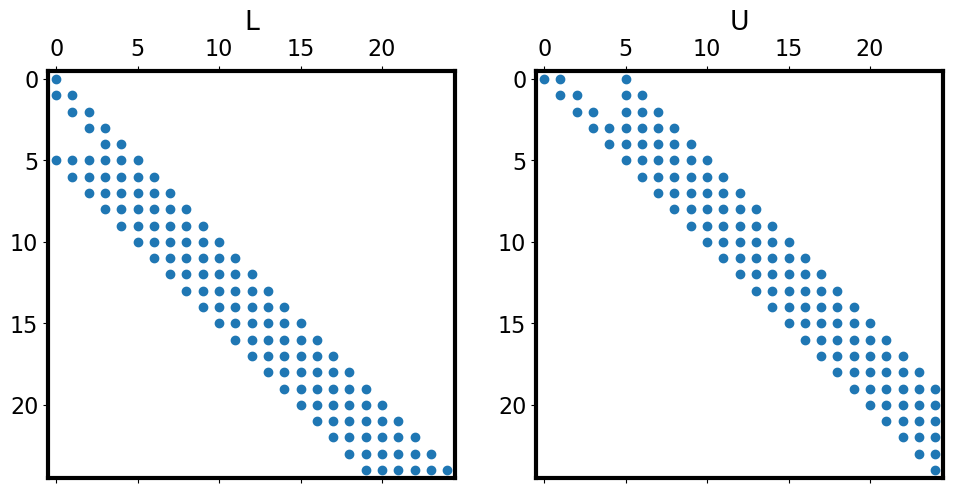

In [11]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt
from laplace_demo import create_laplace_coefficient_matrix

A,b = create_laplace_coefficient_matrix(5,5)
plt.spy(A,marker='o',markersize=6)

# Perform LU decomposition
P,L,U = lu(A.toarray())

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 3
# Plot the sparsity patterns of L and U
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.spy(L,marker='o',markersize=6)
plt.title('L')
plt.subplot(122)
plt.spy(U,marker='o',markersize=6)
plt.title('U')
plt.tight_layout()
plt.savefig('sparse_lu.pdf')

plt.rcdefaults()


In [12]:
%reset -f

## Iterative solvers

In [13]:
from laplace_demo import create_laplace_coefficient_matrix, set_boundary_conditions
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
import numpy as np 
import matplotlib.cm as cm

Nx = Ny = 20

Tb = {'bottom': 20, 'left': 40, 'right': 80, 'top': 100}
A,b = create_laplace_coefficient_matrix(Nx,Ny)
A,b = set_boundary_conditions(A, b, Tb, Nx, Ny)


In [14]:
T_num = spsolve(A,b).reshape((Nx,Ny))

In [15]:
from it_methods import jacobi

if not isinstance(A,np.ndarray):
    A = A.toarray()

sol,n_it = jacobi(A,b,tol=1e-3)
print(f'Solved in {n_it} iterations!')

T_num = sol.reshape(Nx,Ny)


324
Solved in 324 iterations!


In [ ]:
from it_methods import jacobi_vec

if not isinstance(A,np.ndarray):
    A = A.toarray()

sol,n_it = jacobi_vec(A,b,tol=1e-3,itmax=5)
print(f'Solved in {n_it} iterations!')

T_num = sol.reshape(Nx,Ny)

In [ ]:
from it_methods import gaussseidel

if not isinstance(A,np.ndarray):
    A = A.toarray()

sol,n_it = gaussseidel(A,b,tol=1e-3)
print(f'Solved in {n_it} iterations!')

T_num = sol.reshape(Nx,Ny)

In [ ]:
from it_methods import gaussseidel_vec

if not isinstance(A,np.ndarray):
    A = A.toarray()

sol,n_it = gaussseidel_vec(A,b,tol=1e-3)
print(f'Solved in {n_it} iterations!')

T_num = sol.reshape(Nx,Ny)

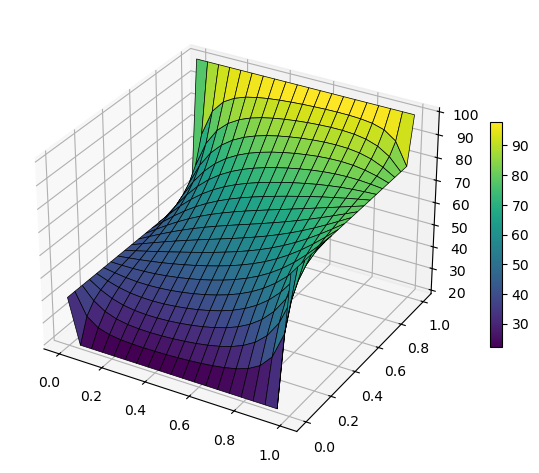

In [17]:
x,y = np.meshgrid(np.linspace(0,1,Nx),np.linspace(0,1,Ny))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x,y,T_num,cmap=cm.viridis,edgecolor='black',linewidth=0.5)
fig.colorbar(surf, shrink=0.5)
plt.tight_layout()
# plt.show()
plt.savefig('python_it5.pdf')